# [BossDB](https://bossdb.org/) Cookbook: How-tos and Examples for using BossDB

BossDB (Brain Observatory Storage Service & Database) is a volumetric database for 3D and 4D neuroscience data.

The BossDB Cookbook repository is a collection of introductory notebooks and examples for interfacing with the BossDB system. 

For a quick introduction to BossDB, check out our [Getting Started Page](https://bossdb.org/get-started) and [introductory videos](https://www.youtube.com/channel/UCOKBtUhLgr-AtfGUxA-K6lg/featured).

Click here for a Binder of this repository and test out our notebooks in your browser: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aplbrain/bossdb_cookbook/HEAD?filepath=notebooks%2F)

## Accessing Data

Our public datasets have an example of how to access their data using [intern](https://github.com/jhuapl-boss/intern) at the top of their [project page](https://bossdb.org/projects), however many datasets have more data available than shown in that example, such as additional segmentations or scans. To access these datasets you will need to know the dataset URI. 

- [How To Find The BossDB URI For A Dataset](https://github.com/aplbrain/bossdb_cookbook/blob/main/docs/How-To-Find-The-BossDB-URI-For-A-Dataset.md)

You may wish to access your own private data that is hosted on BossDB or someone has shared not-yet-public data with you:
- [How To Access Private Data](https://github.com/aplbrain/bossdb_cookbook/blob/main/docs/BossDB-Set-Up-For-Private-Datasets.md)

## Uploading Data

Are you enjoying how easy BossDB makes it to use our publicly hosted data and want to upload your own? 
- [How To Upload Data To BossDB](https://github.com/aplbrain/bossdb_cookbook/blob/main/docs/How-To-Upload-Data-To-BossDB.md)

## Where does BossDB fit in the Neuroscience World?

- [BossDB and Connectomics](https://github.com/aplbrain/bossdb_cookbook/blob/main/docs/BossDB-And-Connectomics.md)

## Specific Projects

**MICrONS Pinky 100 - Layer 2/3:**
- [General Information](https://github.com/aplbrain/bossdb_cookbook/blob/main/docs/IARPA_MICrONS_Pinky_100_Dataset.md)
- [Data Access Notebook](https://github.com/aplbrain/bossdb_cookbook/blob/main/notebooks/IARPA-MICrONS-Pinky100.ipynb)

### Accessing Downsampled Data from BossDB

Many datasets on BossDB have been downsampled to provide lower resolutions versions of the data for faster access and quicker visualization.

To see if a dataset has lower resolutions available you can use the array function from Intern. We will show you below.

However, you can also use the bossdb management console to view downsampled status and hierarchy levels.

First, check the Experiment Details page for the experiment you are interested. In the Experiment Properties section you will see a Num hierarchy levels section. This will tell you how many different resolution levels there are. See our API documentation for more information on how downsampling is done. In general, for each level of downsampling the data is downsampled by a factor of 2. If the dataset is anisotropic, the data is only downsampled in the x and y directions.

https://api.bossdb.io/v1/mgmt/resources/prasad/prasad2020 for this dataset you can see that there are 7 levels of downsampling.

Next, check the Channel Details page. If a dataset has been downsampled you will see a green box with 'Downsampled' next to 'Downsampled Status' at the top of the channel details page. See here for an example of a channel taht has been downsampled: https://api.bossdb.io/v1/mgmt/resources/prasad/prasad2020/image

In [ ]:
# Install dependencies / requirements
!pip install intern

In [2]:
from intern import array
import matplotlib.pyplot as plt

In [3]:
dataset_res_0 = array("bossdb://prasad/prasad2020/image")

In [4]:
# this is the size of the original dataset
dataset_res_0.shape

(720, 2048, 6144)

In [5]:
slice_res_0 = dataset_res_0[300:301, 0:2048, 0:6144]

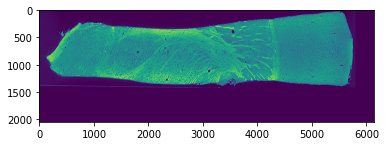

In [6]:
plt.imshow(slice_res_0)

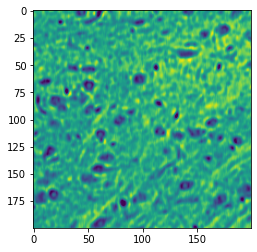

In [7]:
plt.imshow(slice_res_0[500:700, 2000:2200])

It took a little long to get that slice from the dataset, let's check if this channel has been downsampled

In [8]:
dataset_res_0._channel.downsample_status

'DOWNSAMPLED'

Great! It has been downsampled. Let's see how many levels of downsampling there are.

In [9]:
dataset_res_0._exp.num_hierarchy_levels

7

Awesome, this dataset has 7 levels. This means it has been downsampled 6 times (the levels include the original (0) resolution). We can view the data at any of these levels.

To do this, we can set the resolution level when we call array.

In [10]:
dataset_res_6 = array("bossdb://prasad/prasad2020/image", resolution=6)

In [11]:
dataset_res_6.shape

(720, 32, 96)

You can see this dataset is much smaller! This is the smallest resolution. Accessing the data will be much faster.

In [12]:
slice_res_6 = dataset_res_6[300:301, 0:32, 0:96]

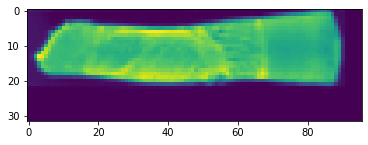

In [13]:
plt.imshow(slice_res_6)

Since this dataset is anisotropic, the data is only downsampled in the x and y directions. We can compare the original and downsampled data at the same slice.

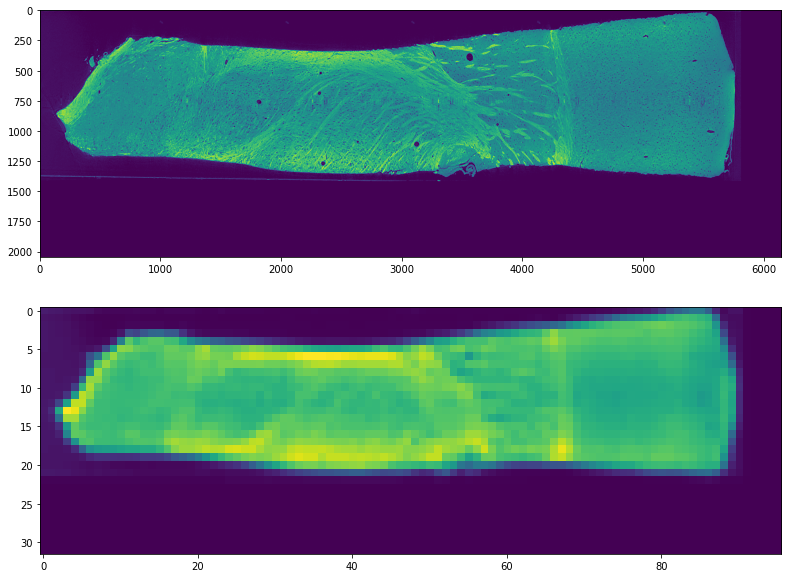

In [14]:
fig, axes = plt.subplots(2,1, figsize=(40,10))
axes[0].imshow(slice_res_0)
axes[1].imshow(slice_res_6)
plt.show()

Let's view a resolution in the middle.

In [15]:
dataset_res_3 = array("bossdb://prasad/prasad2020/image", resolution=3)
dataset_res_3.shape

(720, 256, 768)

In [16]:
slice_res_3 = dataset_res_3[300:301, 0:256, 0:768]

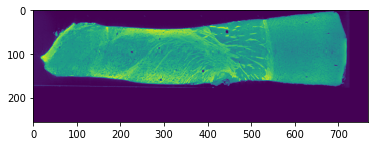

In [17]:
plt.imshow(slice_res_3)

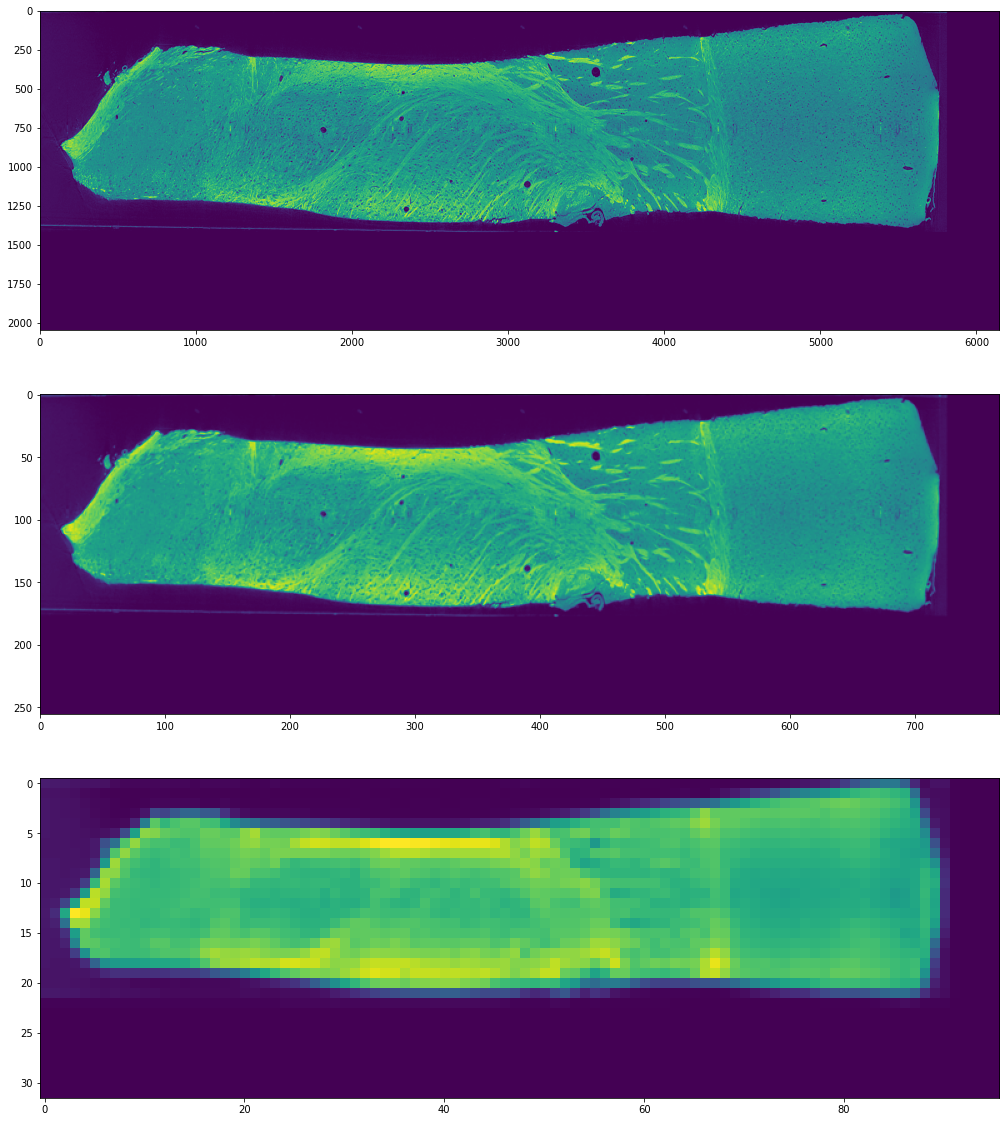

In [18]:
fig, axes = plt.subplots(3,1, figsize=(40,20))
axes[0].imshow(slice_res_0)
axes[1].imshow(slice_res_3)
axes[2].imshow(slice_res_6)
plt.show()

### Custom BossDB Dataset classes for Pytorch DataLoaders

In this section we provide some example custom Dataset classes for use with Pytorch DataLoaders. Please see https://pytorch.org/tutorials/beginner/basics/data_tutorial.html and https://pytorch.org/tutorials/beginner/data_loading_tutorial.html for additional information. These classes can easily be adapted for your specific needs.

#### <b>Common Definitions:</b>
<b>boss_uri:</b> the BossDB path to the project, channel, and experiment you would like to use, e.g. 'bossdb://kuan_phelps2020/drosophila_brain_120nm/drBrain_120nm_rec'

<b>boss_config</b>: if you are accessing a private dataset you can pass your boss config information (see https://github.com/jhuapl-boss/intern/wiki/Boss-Setup-Tutorial) however if you are accessing a public dataset you do not need a config and can leave the default None input

<b>centroid_list_zyx:</b> A list of coordinate points you would like the images/volumes/arrays to be centered on

<b>pxradius*:</b> A list of the number of pixels on either side of the centroid (i.e. the radius) you would like to include in the image/volume/array. e.g. if I wanted each image to be 128x128 pixels I would set this to [64, 64]

<b>transform:</b> The transform or group of transforms you want to apply to the data. (see https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html)

In [21]:
from typing import Tuple, List
from intern import array
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

#### <b>Dataset class for when you need single image slices from the data</b>

In [22]:
class BossDBSliceDataset(Dataset):
    
    def __init__(
        self, 
        boss_uri: str, 
        centroid_list_zyx: List[Tuple[int, int, int]],
        px_radius_yx: Tuple[int, int],
        boss_config: dict = None, 
        transform=ToTensor()
        
    ):
        self.config = boss_config
        self.array = array(boss_uri, boss_config=boss_config)
        self.centroid_list = centroid_list_zyx
        rad_y, rad_x = px_radius_yx
        self.px_radius_y = rad_y
        self.px_radius_x = rad_x
        self.transform = transform
    
    def __getitem__(self, key):
        z, y, x = self.centroid_list[key]
        array =  self.array[
            z : z + 1,
            y - self.px_radius_y : y + self.px_radius_y,
            x - self.px_radius_x : x + self.px_radius_x,
        ]
        if self.transform:
            array = self.transform(array)
            
        return array

    def __len__(self):
        return len(self.centroid_list)

#### <b>Dataset class for when you need single image slices and corresponding segmentation masks from the data</b>

In [23]:
class BossDBSliceDataset(Dataset):
    
    def __init__(
        self, 
        image_boss_uri: str, 
        mask_boss_uri: str, 
        boss_config: dict, 
        centroid_list_zyx: List[Tuple[int, int, int]],
        px_radius_yx: Tuple[int, int],
        image_transform=ToTensor(),
        mask_transform=None
    ):
        self.config = boss_config
        self.image_array = array(image_boss_uri, boss_config=boss_config)
        self.mask_array = array(mask_boss_uri, boss_config=boss_config)
        self.centroid_list = centroid_list_zyx
        rad_y, rad_x = px_radius_yx
        self.px_radius_y = rad_y
        self.px_radius_x = rad_x
        self.image_transform = image_transform
        self.mask_transform = mask_transform
    
    def __getitem__(self, key):
        z, y, x = self.centroid_list[key]
        image_array =  self.image_array[
            z : z + 1,
            y - self.px_radius_y : y + self.px_radius_y,
            x - self.px_radius_x : x + self.px_radius_x,
        ]
        mask_array =  self.mask_array[
            z : z + 1,
            y - self.px_radius_y : y + self.px_radius_y,
            x - self.px_radius_x : x + self.px_radius_x,
        ]
        
        
        if self.image_transform:
            image_array= self.image_transform(image_array)
            
        if self.mask_transform:
            mask_array = self.mask_transform(mask_array)
        
        mask_array = torch.from_numpy(mask_array.astype('int64')).long()
            
        return image_array, mask_array

    def __len__(self):
        return len(self.centroid_list)

#### <b>Dataset class for when you need 3D image volumes from the data</b>

In [24]:
class BossDBDataset(Dataset):
    
    def __init__(
        self, 
        boss_uri: str, 
        centroid_list_zyx: List[Tuple[int, int, int]],
        px_radius_zyx: Tuple[int, int, int],
        transform=ToTensor(),
        boss_config: dict = None, 
    ):
        self.config = boss_config
        self.array = array(boss_uri, boss_config=boss_config)
        self.centroid_list = centroid_list_zyx
        rad_z, rad_y, rad_x = px_radius_zyx
        self.px_radius_z = rad_z
        self.px_radius_y = rad_y
        self.px_radius_x = rad_x
        self.transform = transform
    
    def __getitem__(self, key):
        z, y, x = self.centroid_list[key]
        array = self.array[
            z - self.px_radius_z : z + self.px_radius_z,
            y - self.px_radius_y : y + self.px_radius_y,
            x - self.px_radius_x : x + self.px_radius_x,
        ]
        if self.transform:
            array = self.transform(array)
            
        return array

    def __len__(self):
        return len(self.centroid_list)

#### <b>Dataset class for when you need 3D image volumes and corresponding segmentation masks from the data</b>

In [25]:
class BossDBDataset(Dataset):
    
    def __init__(
        self, 
        image_boss_uri: str, 
        mask_boss_uri: str, 
        centroid_list_zyx: List[Tuple[int, int, int]],
        px_radius_zyx: Tuple[int, int, int],
        image_transform=ToTensor(),
        mask_transform=None,
        boss_config: dict = None, 
    ):
        self.config = boss_config
        self.image_array = array(image_boss_uri, boss_config=boss_config)
        self.mask_array = array(mask_boss_uri, boss_config=boss_config)
        self.centroid_list = centroid_list_zyx
        rad_z, rad_y, rad_x = px_radius_zyx
        self.px_radius_z = rad_z
        self.px_radius_y = rad_y
        self.px_radius_x = rad_x
        self.image_transform = image_transform
        self.mask_transform = mask_transform
    
    def __getitem__(self, key):
        z, y, x = self.centroid_list[key]
        image_array = self.image_array[
            z - self.px_radius_z : z + self.px_radius_z,
            y - self.px_radius_y : y + self.px_radius_y,
            x - self.px_radius_x : x + self.px_radius_x,
        ]
        
        mask_array = self.mask_array[
            z - self.px_radius_z : z + self.px_radius_z,
            y - self.px_radius_y : y + self.px_radius_y,
            x - self.px_radius_x : x + self.px_radius_x,
        ]
        if self.image_transform:
            image_array = self.transform(image_array)
            
        if self.mask_transform:
            mask_array = self.mask_transform(mask_array)
        
        mask_array = torch.from_numpy(mask_array.astype('int64')).long()
            
        return image_array, mask_array

    def __len__(self):
        return len(self.centroid_list)

#### <b>Five Minute Jump-Start for BossDB</b>

Please see our [Getting Started Page](https://bossdb.org/get-started) for more detailed information!

Requirements:

* [Intern](https://github.com/jhuapl-boss/intern)
* [Matplotlib](https://matplotlib.org/stable/users/installing.html)

In [26]:
from intern import array
import matplotlib.pyplot as plt

# to make a neuroglancer link
from IPython.display import display, HTML

In [27]:
# provide the dataset URI (collection/experiment/channel) to access the data:
bossdb_dataset = array("bossdb://kuan_phelps2020/drosophila_brain_120nm/drBrain_120nm_rec")
# Save a cutout to a numpy array in ZYX order:
my_cutout = bossdb_dataset[50:60, 1000:1500, 1000:1500]

In [28]:
# bossdb_dataset can be treated like a numpy array to get information on the size and type of the whole dataset
print(bossdb_dataset.shape)
print(bossdb_dataset.dtype)

(3200, 3200, 3200)
uint8


In [29]:
# the cutout is just a large numpy array
my_cutout[1]

array([[ 67,  72,  76, ...,  71,  70,  73],
       [ 68,  73,  78, ...,  68,  68,  70],
       [ 71,  76,  79, ...,  69,  69,  69],
       ...,
       [ 43,  43,  44, ..., 113, 118, 122],
       [ 43,  43,  44, ..., 113, 116, 119],
       [ 47,  44,  44, ..., 112, 113, 115]], dtype=uint8)

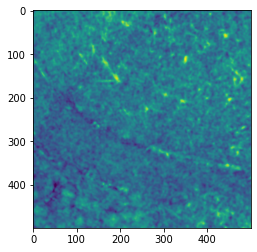

In [30]:
# you can visualize it using matplotlib or your favorite visualization package
plt.imshow(my_cutout[5])

In [31]:
# get a link to view the dataset on Neuroglancer
bossdb_dataset.visualize

"https://neuroglancer.bossdb.io/#!{'layers':{'image':{'source':'boss://https://api.bossdb.io/kuan_phelps2020/drosophila_brain_120nm/drBrain_120nm_rec'}}}"

In [33]:
# make it clickable
display(HTML('<a href="{0}">link</a>'.format(bossdb_dataset.visualize)))

### How to access the EM and segmentation data from MICrONS Pinky 100 dataset using BossDB

This dataset consists of Electron Microscopy (EM) image data, segmentation data, and corresponding meshes of the cortical circuitry from the mouse visual cortex. This dataset was acquired and analyzed in the initial phase of the MICrONS project. It is a 250 x 140 x 90 µm volume from layer 2/3 of a P36 male mouse visual cortex imaged at 3.58 x 3.58 x 40 nm resolution with a dense segmentation, proofreading of all dendrites and axons of the 364 excitatory neurons in the volume, and dense synapse detection.

More information, including up to date release notes, can be found at the [MICrONS Explorer website](https://www.microns-explorer.org/phase1).

Further information can also be found on the [BossDB project page](https://bossdb.org/project/microns-pinky) for this dataset

Here we will show you how use [intern](https://github.com/jhuapl-boss/intern) to access the EM and segmentation data that is hosted on BossDB.

In [34]:
from intern import array
import matplotlib.pyplot as plt
# for displaying links
from IPython.display import display, HTML

#### <b>Accessing the Electron Microscopy images</b>

In [35]:
# electron microscopy data
em = array("bossdb://microns/pinky100/em")

In [36]:
# the size of the original resolution dataset
em.shape

(2177, 83968, 124928)

In [38]:
# get a link to the dataset on the Boss Management Console
display(HTML('<a href="{0}">Boss Management Console Link</a>'.format(em.url)))

In [39]:
# check the resolution of the data we are looking at
em.resolution

0

In [40]:
# check voxel size
em.voxel_size

((40.0, 4.0, 4.0), 'nanometers')

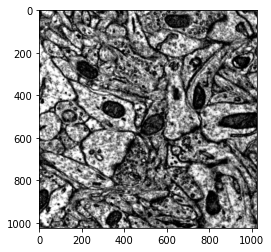

In [41]:
# let's download a slice cutout
em_data = em[824:825, 55000:56024, 79190:80214]
# and view it!
plt.imshow(em_data, cmap='gray')

In [42]:
# check the size of the cutout
em_data.shape

(1024, 1024)

In [43]:
# we can also view downsampled versions of this data
# let's check how many downsampled resolutions are available
em._exp.num_hierarchy_levels

9

In [44]:
# let's view data which has been downsampled just once
em_res_1 = array("bossdb://microns/pinky100/em", resolution=1)

In [45]:
em_res_1.shape

(2177, 41984, 62464)

In [46]:
em_res_1.resolution

1

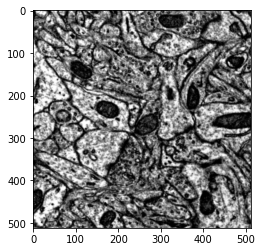

In [47]:
# let's download a slice cutout
em_data_res_1 = em_res_1[824:825, 27500:28012, 39595:40107]
# and view it!
plt.imshow(em_data_res_1, cmap='gray')

#### <b>Accessing the segmentation images</b>

In [48]:
seg = array("bossdb://microns/pinky100_8x8x40/segmentation")

In [49]:
seg.shape

(2177, 40960, 61440)

In [50]:
seg.voxel_size

((40.0, 8.0, 8.0), 'nanometers')

In [51]:
seg.resolution

0

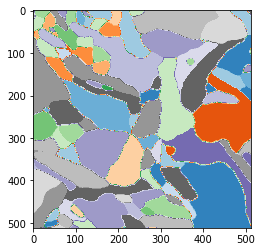

In [52]:
# let's download a slice cutout
seg_data = seg[824:825, 27500:28012, 39595:40107]
# and view it!
plt.imshow(seg_data.astype("uint8"), cmap='tab20c')

# we need to convert the seg data to unit8 instead of uint64 for visualization purposes

In [53]:
seg_data.dtype

dtype('uint64')

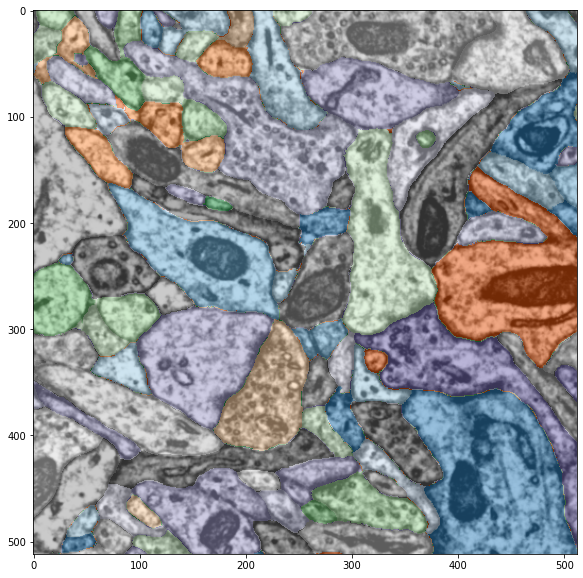

In [54]:
# lets view it overlaid on the EM data
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(em_data_res_1, cmap="Greys_r")
ax.imshow(seg_data.astype("uint8"), cmap="tab20c", alpha=0.5)

### Using intern to download open neuroscience data from BossDB.org

In this notebook, we'll explore using the [intern](https://github.com/jhuapl-boss/intern) library to download large-scale neuronscience image datasets from [BossDB](https://bossdb.org/).

#### <b>1. Make sure intern is installed</b>

In [55]:
try: 
    from intern import array
except ImportError:
    print("Intern not installed on this kernel.")

If not installed you can run ONE of the two lines below to install it with pip (uncomment the one you want), the python package manager. The following cells run a bash command that installs it to your current python library. You might have to restart the kernel after installation for intern to import correctly. You can do this by clicking "Kernel" at the top navigation bar and then clicking "Restart". You may also want to instead use a virtual environment to install intern and restart this notebook within that environment.

In [56]:
# For regular pip
# !pip install intern

# For pip3
# !pip3 install intern

#### <b>2: Choosing a dataset</b>

Let's choose a dataset to inspect. Visit the BossDB.org projects page (https://bossdb.org/projects) to view all of the public datasets currently hosted on BossDB.

In this notebook, we'll explore the seminal dataset from "Saturated reconstruction of a volume of cortex" (Kasthuri et al., Cell 2015) where they mapped part of the mouse cortex, available from https://bossdb.org/project/kasthuri2015.

We can use the array() functionality from intern to download part of the data. We will be first downloading electron microscopy image data which consists of dense arrays of integers ranging from 0 to 255. Since the EM image is grayscale we only have one channel to worry about, compared to RGB images which have three channels.

To get data, we need to provide the array() function an address of where the data "exists". In bossDB, we have an hierarchical organizational structure (similar to file system) where we organize datasets by "collection", "experiment", and "channel".

Collections are the top structure containing metadata like the lab name and date of creation. Experiments are middle-level structure containing more metadata about coordinate frames (Where data exists), resolution levels, voxel size. Channels are the lowest structure and the one that actually contains volumetric data.

The URI for a bossdb dataset therefore follows a collection -> experiment -> channel pattern. For example, the dataset we are accessing comes from the Kasthuri lab so the collection is just called Kasthuri. The specific dataset is called AC4 so the experiement is AC4 and we are trying to get the EM images so the channel is em.

General URI:

        bossdb://{Collection}/{Experiment}/{Channel}


For this example dataset:

        bossdb://Kasthuri/ac4/em

So first lets create an array object with this URI. It doesn't download any data yet, but points to where the dataset lives to easily grab "cutouts" or subsets of the data.

In [57]:
dataset = array("bossdb://Kasthuri/ac4/em")

array is an indexable object where you can specify X, Y, Z ranges and download that portion of data. How do you know what ranges even exist in the data? You can check shape attribute for that information.

In [58]:
dataset.shape

(100, 1024, 1024)

Okay so this dataset is 100 voxels in the Z dimension, 1024 voxels in the X and Y dimensions.

You can also check the datatype of the object.

In [59]:
dataset.dtype

'uint8'

#### <b>3: Downloading a subvolume</b>

Because some BossDB datasets are many terabytes or even petabytes in size, it doesn't make sense to try to download the entire dataset all in one go. Instead, you'll probably find that you want to focus on small chunks of the data when running algorithms or processing locally.

intern makes it easy to download data: We can just treat the dataset like a giant numpy array.

<b>Note that array coordinates are stored in ZYX order, as a convention.</b> This will make some later steps easier, but it can be a common "gotcha" for new users! The syntax is like regular indexing for numpy arrays:

        array[z_start: z_stop, y_start: y_stop, x_start: x_stop]

Lets download a portion of data and check out the resulting array.

In [60]:
em_data = dataset[20:22, 256:768, 256:768]

Once the cell above has completed, we have a 2×512×512 pixel cutout:

In [61]:
em_data.shape

(2, 512, 512)

Unlike the dataset variable, this cutout of data is actually downloaded and available on your computer! Lets check a small portion of the raw data. We should expect integers from 0 to 255.

In [62]:
em_data[0][0:10, 0:10]

array([[135, 142, 142, 143, 139, 145, 150, 158, 166, 166],
       [146, 143, 141, 143, 148, 151, 164, 170, 165, 177],
       [164, 166, 163, 151, 151, 164, 171, 167, 160, 161],
       [149, 157, 158, 153, 158, 158, 157, 160, 161, 154],
       [149, 151, 151, 152, 148, 138, 143, 155, 154, 161],
       [153, 156, 160, 150, 136, 129, 131, 137, 147, 146],
       [156, 149, 150, 145, 144, 136, 138, 136, 141, 127],
       [154, 151, 157, 150, 148, 150, 148, 147, 145, 148],
       [152, 162, 166, 153, 155, 156, 153, 152, 138, 148],
       [157, 166, 166, 159, 156, 161, 154, 152, 135, 133]], dtype=uint8)

Looks good! But this isn't really that useful. To actually visualize the image, we can use pillow or matplotlib to plot it. In this example I plot it with matplotlib. The function we will use is `imshow()`. This takes in a 2D array and plots it using a colormap. We can use a "gray" colormap to get the authentic "electron microscope" feel.

Notice that the data we downloaded is a 3D array. Meaning that in order to plot a single image, we need to index the z dimension to a single slice so we are only plotting a 2D array. Think of it as getting a single cross-section of a cube and looking at that cross-section. Later on we will explore ways to visualize the data in 3D.

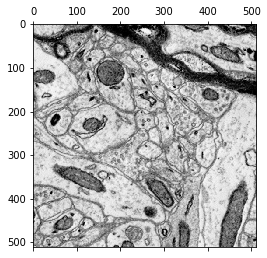

In [63]:
import matplotlib.pyplot as plt

plt.matshow(em_data[0], cmap="Greys_r")

Voila! This is actual brain tissue. You can see individual membranes, mitochondria, myelin sheath, and a bunch of other biological components in this single image. The shape of the image is 512 by 512 as seen by the axis which makes sense since our X and Y bounds were both 512.

#### <b>4: Coregistered channels</b>

EM data is not the only thing in this experiment. We can also download "segmentations", or a dense labelling of all the neurons/processes in the volume. In the Kasthuri data, the neuron segmentation channel is called neuron. Its in the same collection and experiment as the EM channel. Typically this is what you see for a lot of the datasets, where the EM and any by-products (segmentation, annotations) exist in the same experiment. So in this case the URI for the segmentation channel would be:

        bossdb://Kasthuri/ac4/neuron

Note: Segmentation datatype is 64-bit integers. The reason for this is because there are so many neurons in some datasets that we need a higher bit depth to have enough integers where each neuron has its own unique ID.

        8-bit : 256 unique values
        16-bit : 65,536 unique values
        64-bit : 1.84E19 unique values

Another Note: For plotting purposes, I would use a gradient or random color map to see all the neuron shapes clearly. Here we will use smaller color maps just for examples.

In [64]:
neuron_segmentation = array("bossdb://Kasthuri/ac4/neuron")
seg_data = neuron_segmentation[20:22, 256:768, 256:768]

Let's view the neuron segmentations

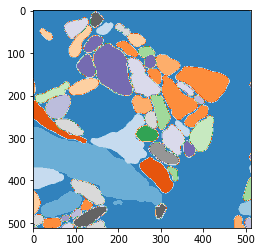

In [65]:
plt.imshow(seg_data[0], cmap="tab20c")

Looks good! Now one last thing thats super useful is to overlay both plots to get a sense of where the individual membranes are and where processes are interacting. We can do this by first plotting the EM array like before and then the seg array on top with some level of transparency.

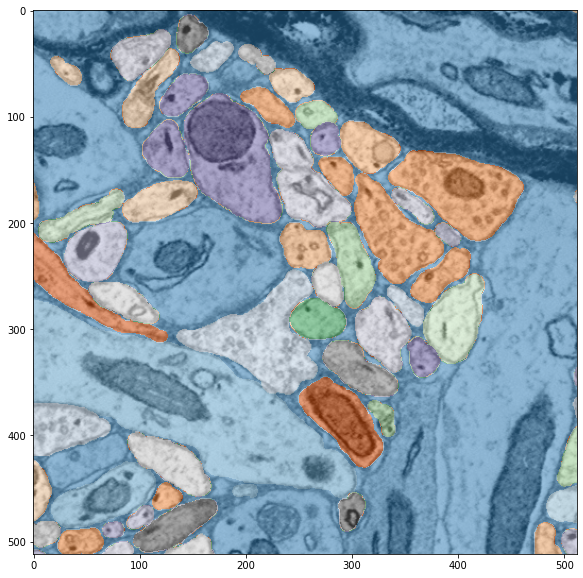

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(em_data[0], cmap="Greys_r")
ax.imshow(seg_data[0], alpha=0.5, cmap="tab20c")

As you can see above the individual neurons processes for this slices are highlighted in different colors. Now some processes can appear twice in one frame disconnecteed from each other as neurons branch out, which is why some colors show up multiple times.

For this dataset, we also have membrane and synapse channels. Let's try viewing those as well

In [67]:
mem = array("bossdb://Kasthuri/ac4/membrane")[20, 256:768, 256:768]
syn = array("bossdb://Kasthuri/ac4/synapse")[20, 256:768, 256:768]

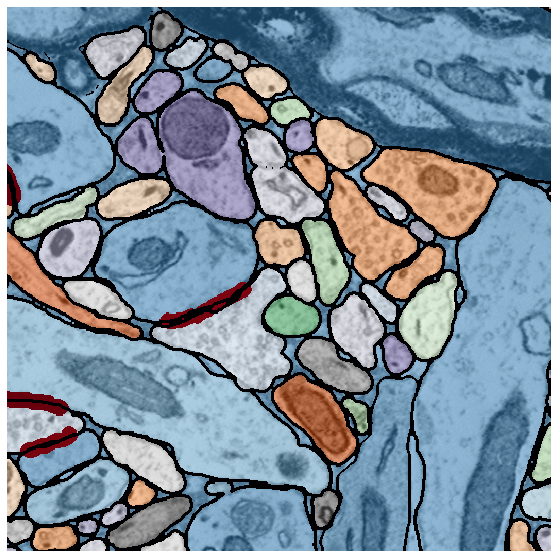

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(em_data[0], cmap="Greys_r")
ax.imshow(seg_data[0], cmap="tab20c", alpha=0.5)

ax.imshow(syn, cmap="Reds", alpha=(syn > 0).astype("uint8"))
ax.imshow(mem, cmap="magma_r", alpha=(mem > 0).astype("uint8"))
plt.axis("off")
plt.show()

#### <b>5: Downsampled data</b>

Sometimes we want to see a large span of tissue, but we don't care about pulling it down to our local compute resources at high resolution (e.g. for visualization or gross anatomical analyses).

BossDB and intern support this use-case by providing server-side downsampled data. Rather than downloading large volumes of data and then throwing away the high resolution information, BossDB will instead serve a lower-resolution cutout, saving you time and bandwidth. With this technique, it is possible to download and visualize full datasets without waiting for terabytes of data to download and save.

To download a downsampled cutout, we'll simply pass a resolution argument to the array constructor.

Resolution 0 is the highest resolution data available; resolution 1 (or "res 1") holds a downsample of every other pixel; res 2 stores every 4 pixels, and so on. As a rule of thumb, if a cube of data is 1 terabyte, then res 1 is one eighth of a terabyte (125 GB), res 2 is a little under 16 GB, and so on. (BossDB also supports anisotropic downsampling, if an imaging modality is not imaged with equal resolution. More on that later!)

To illustrate, let's download a large cutout from "Reconstruction of motor control circuits in adult Drosophila using automated transmission electron microscopy" (Phelps, Hildebrand, & Graham et al., Cell 2021) (https://bossdb.org/project/phelps_hildebrand_graham2021)

In [69]:
downsampled_dataset = array("bossdb://phelps_hildebrand_graham2021/FANC/em", resolution=6)

In [70]:
downsampled_dataset.shape

(4400, 4128, 2144)

In [71]:
downsampled_cutout = downsampled_dataset[1000, :, 0:1500]

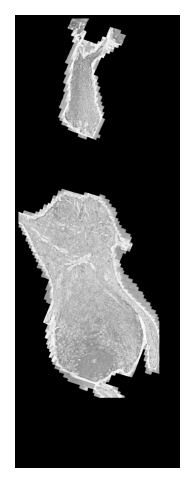

In [72]:
plt.figure(dpi=150)
plt.imshow(downsampled_cutout, cmap="Greys_r")
plt.axis("off")
plt.show()

Though this dataset spans many terabytes on disk, we are able to rapidly view gross morphology through this downsample service.